<a href="https://colab.research.google.com/github/simulate111/Data-Science_2024/blob/main/MP2_CHARTIER_Romain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving MP2_Data.csv to MP2_Data.csv


import relevant libraries

In [2]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold

# Data Processing

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['MP2_Data.csv']))
nrow, ncol = df.shape
print(f'There are {nrow} rows and {ncol} columns in the data set.')
df.describe()
df.info()
df.head()

There are 107 rows and 48 columns in the data set.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18 

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


Check for missing values

In [4]:
nan_count = df.isna().sum()
if nan_count.sum() > 0:
    print("Missing values found:")
    print(nan_count)

Retaining certain features.

In [5]:
# Drop the 'ID' and 'Grade' columns
X = df.drop(columns=['ID', 'Grade', 'Week8_Total', 'Week2_Quiz1'])

# Status described in the assignment, we aggregate them.
X['Cumulative_Stat0'] = X[[f'Week{i}_Stat0' for i in range(1, 10)]].sum(axis=1)
X['Cumulative_Stat1'] = X[[f'Week{i}_Stat1' for i in range(1, 10)]].sum(axis=1)
X['Cumulative_Stat2'] = X[[f'Week{i}_Stat2' for i in range(1, 10)]].sum(axis=1)
X['Cumulative_Stat3'] = X[[f'Week{i}_Stat3' for i in range(1, 10)]].sum(axis=1)

# Apply VarianceThreshold to remove low-variance features
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_transformed = sel.fit_transform(X)

# Get column names of features that were kept
retained_columns = X.columns[sel.get_support()]

# Convert X_transformed back into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=retained_columns)


# Print retained columns
print(retained_columns)

y = df['Grade']

Index(['Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3',
       'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0', 'Week1_Stat2',
       'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2',
       'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2',
       'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2',
       'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2',
       'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2',
       'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2',
       'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2',
       'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2',
       'Week9_Stat3', 'Cumulative_Stat0', 'Cumulative_Stat1',
       'Cumulative_Stat2', 'Cumulative_Stat3'],
      dtype='object')


Obtaining information about the new dataset.

In [6]:
X_transformed_df.describe()
X_transformed_df.info()
X_transformed_df.head()
nrow, ncol = X_transformed_df.shape
print(f'There are {nrow} rows and {ncol} columns in the data set.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week3_MP1         107 non-null    float64
 1   Week3_PR1         107 non-null    float64
 2   Week5_MP2         107 non-null    float64
 3   Week5_PR2         107 non-null    float64
 4   Week7_MP3         107 non-null    float64
 5   Week7_PR3         107 non-null    float64
 6   Week4_Quiz2       107 non-null    float64
 7   Week6_Quiz3       107 non-null    float64
 8   Week1_Stat0       107 non-null    float64
 9   Week1_Stat2       107 non-null    float64
 10  Week1_Stat3       107 non-null    float64
 11  Week2_Stat0       107 non-null    float64
 12  Week2_Stat1       107 non-null    float64
 13  Week2_Stat2       107 non-null    float64
 14  Week2_Stat3       107 non-null    float64
 15  Week3_Stat0       107 non-null    float64
 16  Week3_Stat1       107 non-null    float64
 1

Split our data into training/test (60% training, 40% test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.4, random_state=42)

# Check the information of the training and test sets (rows, columns)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (64, 47)
Test set shape: (43, 47)


# Initialization of the models.

Calculate the MSE as well as initialize the models

In [8]:
# Initialize Linear model
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42,n_estimators=1000)

# Train the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict on the test set
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Clip the predictions to be within the range [0, 5]
linear_preds = np.clip(linear_preds, 0, 5)
# Evaluate the models using Mean Squared Error (MSE)
linear_mse = mean_squared_error(y_test, linear_preds)

rf_mse = mean_squared_error(y_test, rf_preds)

print("MSE, the lower the value the better")

print("Linear Regression MSE:", linear_mse)
print("Random Forest MSE:", rf_mse)

MSE, the lower the value the better
Linear Regression MSE: 0.3639252314217117
Random Forest MSE: 0.2874580465116279


# Create Graphs

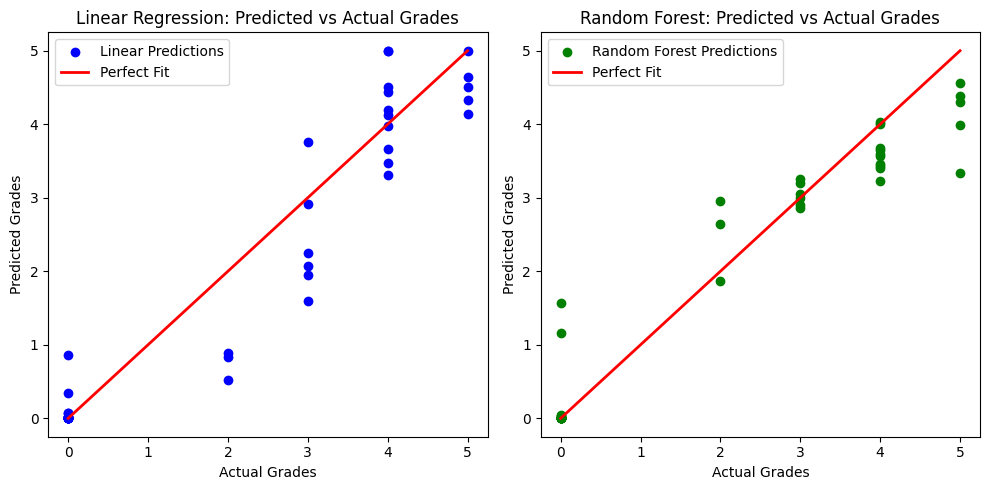

In [9]:
# Create a figure for the comparison
plt.figure(figsize=(10, 5))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_preds, color='blue', label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Fit')
plt.title('Linear Regression: Predicted vs Actual Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()

# Plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_preds, color='green', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Fit')
plt.title('Random Forest: Predicted vs Actual Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()

plt.tight_layout()
plt.show()


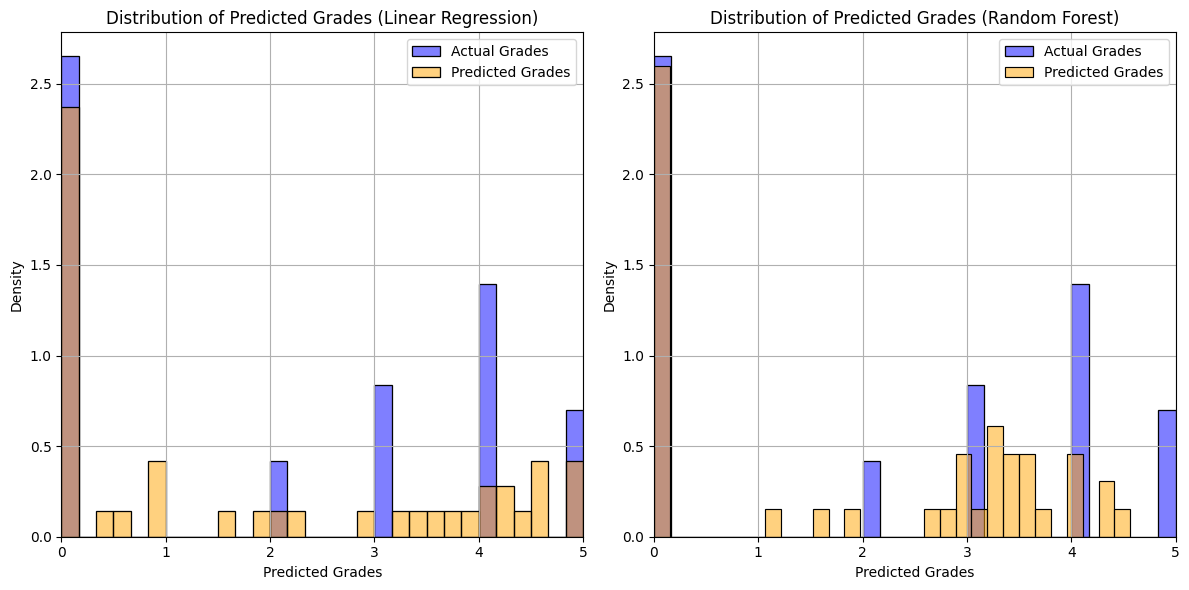

In [10]:

plt.figure(figsize=(12, 6))
# 1. Histogram Linear Regression Predictions
plt.subplot(1, 2, 1)
sns.histplot(y_test, color='blue', label='Actual Grades', stat="density", bins=30, alpha=0.5)
sns.histplot(linear_preds, color='orange', label='Predicted Grades', stat="density", bins=30, alpha=0.5)
plt.title('Distribution of Predicted Grades (Linear Regression)')
plt.xlabel('Predicted Grades')
plt.ylabel('Density')
plt.xlim(0, 5)
plt.legend()
plt.grid(True)

# 2. Histogram Random Forest Predictions
plt.subplot(1, 2, 2)
sns.histplot(y_test, color='blue', label='Actual Grades', stat="density", bins=30, alpha=0.5)
sns.histplot(rf_preds, color='orange', label='Predicted Grades', stat="density", bins=30, alpha=0.5)
plt.title('Distribution of Predicted Grades (Random Forest)')
plt.xlabel('Predicted Grades')
plt.ylabel('Density')
plt.xlim(0, 5)
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


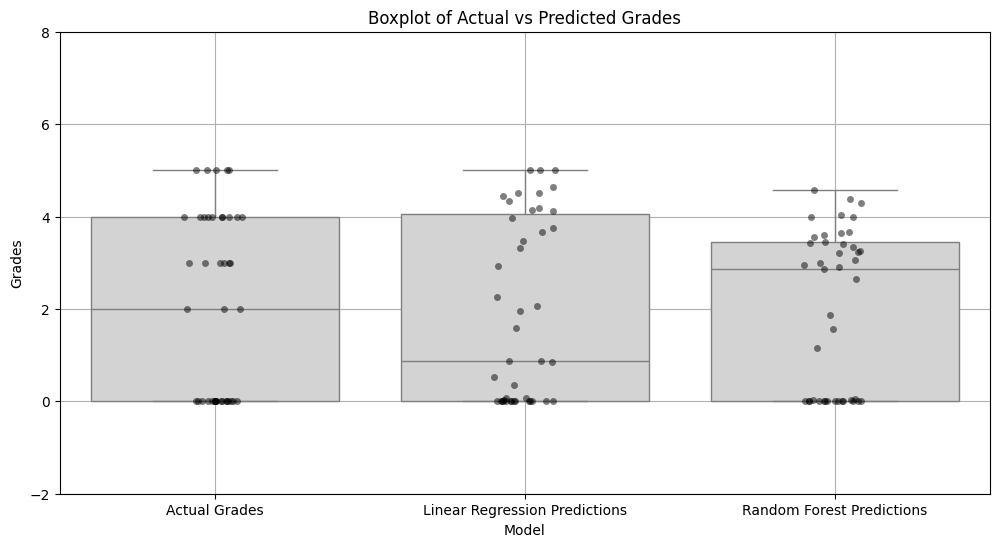

In [11]:


# Combine the actual and predicted values into a single DataFrame for easier plotting
data = {
    'Actual Grades': y_test,
    'Linear Regression Predictions': linear_preds,
    'Random Forest Predictions': rf_preds
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(var_name='Model', value_name='Predicted Grades')

# Create the plot
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(x='Model', y='Predicted Grades', data=df_melted, color='lightgray', showfliers=False)

# Stripplot
sns.stripplot(x='Model', y='Predicted Grades', data=df_melted, color='black', alpha=0.5, jitter=True)

# Customize the plot
plt.title('Boxplot of Actual vs Predicted Grades')
plt.ylabel('Grades')
plt.ylim(-2, 8)  # Set the limits to match your grading scale
plt.grid(True)

# Show the plot
plt.show()


# "Most important features"

(Works only after having initialized and trained the models)

In [12]:
# Get the feature importance values
feature_importance = pd.Series(rf_model.feature_importances_, index=X_transformed_df.columns)
feature_importance_lnr = pd.Series(linear_model.coef_, index=X_transformed_df.columns)
# Sort the top 3 important features
important_features = feature_importance.nlargest(3)
important_features_lnr = feature_importance_lnr.nlargest(3)

# Print the 3 most important features
print("Top 3 important features:\n", important_features)
print("Top 3 important features:\n", important_features_lnr)

Top 3 important features:
 Week7_MP3    0.374689
Week5_MP2    0.242936
Week5_PR2    0.214003
dtype: float64
Top 3 important features:
 Week9_Stat3    0.304757
Week5_MP2      0.129356
Week7_MP3      0.113204
dtype: float64


# Download the dataframe as csv if needed

In [13]:

from google.colab import files
X_transformed_df.to_csv('sample_data.csv', index=False)
files.download('sample_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>